In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("gym_members_exercise_tracking.csv")

In [5]:
#displaying first 5 rows of dataset
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
#displaying information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
#stats about continuos variables
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [8]:
#describing categorical columns
df.describe(include='object')

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [11]:
#checking if there are any missing values
missing_value=df.isnull().sum()/df.shape[0]*100
print(missing_value)

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64


1. Age Distribution

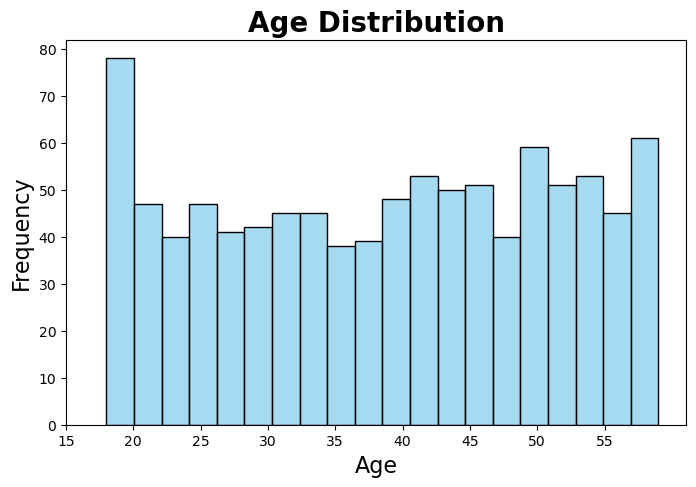

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, color="Skyblue")  

plt.title("Age Distribution", fontsize=20, fontweight="bold")
plt.xlabel("Age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

# Customize x-ticks to show values in increments of 5 years
plt.xticks(range(15, 60, 5))

# Show the plot
plt.show()


2. Gender Distribution

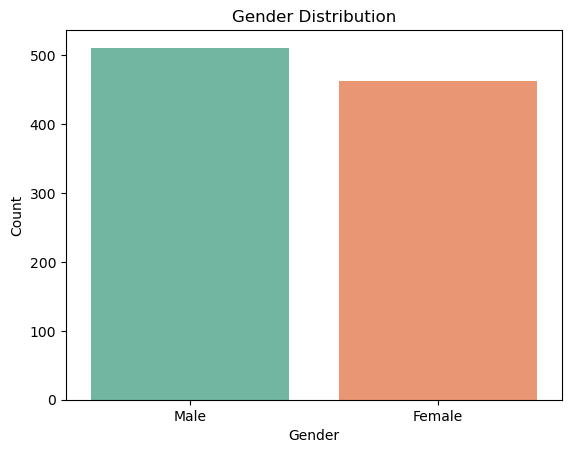

In [41]:
#create a count plot for Gender
plt.figure(figure=(6,4))
sns.countplot(x="Gender", data=df,hue="Gender", palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

3. Weight vs Height Scatter Plot

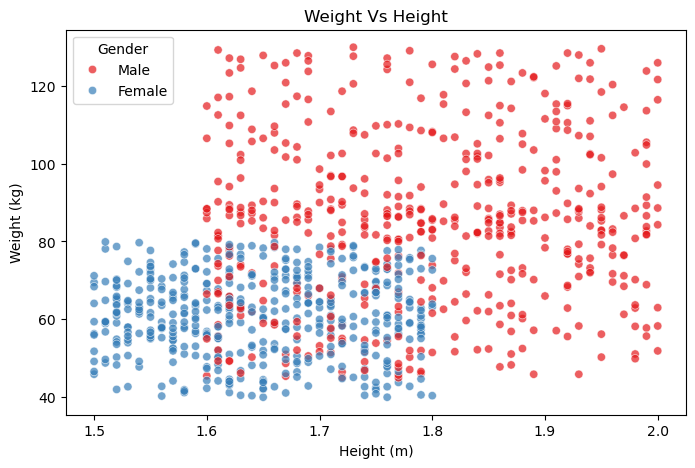

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Height (m)",y="Weight (kg)", data=df, hue="Gender", palette="Set1", alpha=0.7)
plt.title("Weight Vs Height")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(title="Gender")
plt.show()

4. Pie Chart: Workout Type Proportion


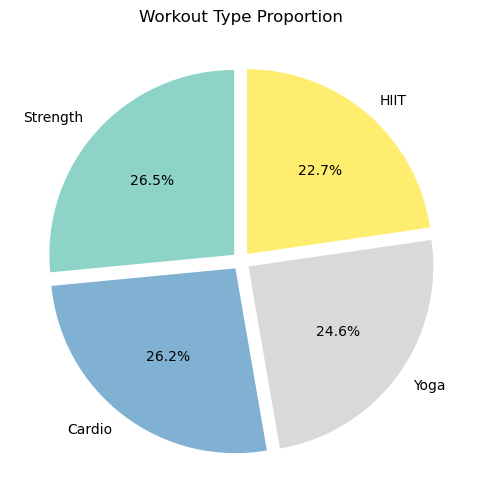

In [27]:
plt.figure(figsize=(6, 6))
explode = [0.05] * len(df['Workout_Type'].unique())  # A list of 0.05 for each unique workout type
df['Workout_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=explode, cmap='Set3')
plt.title('Workout Type Proportion')
plt.ylabel('')  
plt.show()


5. Average BPM by Workout Type

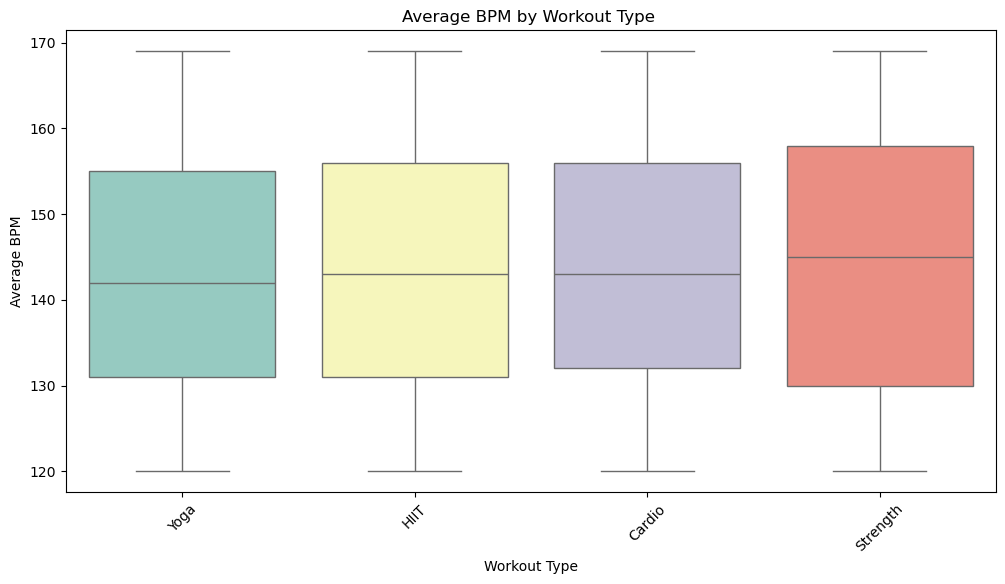

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Workout_Type",y="Avg_BPM", data=df,hue="Workout_Type", palette="Set3")
plt.title("Average BPM by Workout Type ")
plt.xlabel("Workout Type")
plt.ylabel("Average BPM")
plt.xticks(rotation=45)
plt.show()

6. Calories Burned By Session Duration 

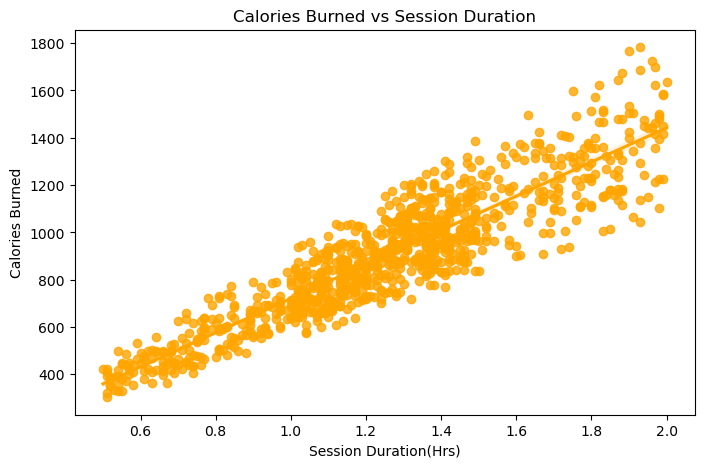

In [35]:
plt.figure(figsize=(8,5))
sns.regplot(x="Session_Duration (hours)",y="Calories_Burned",data=df, color="orange")
plt.title("Calories Burned vs Session Duration")
plt.xlabel("Session Duration(Hrs)")
plt.ylabel("Calories Burned")
plt.show()


7.Stacked Bar Plot: Workout Type By Gender

<Figure size 1000x800 with 0 Axes>

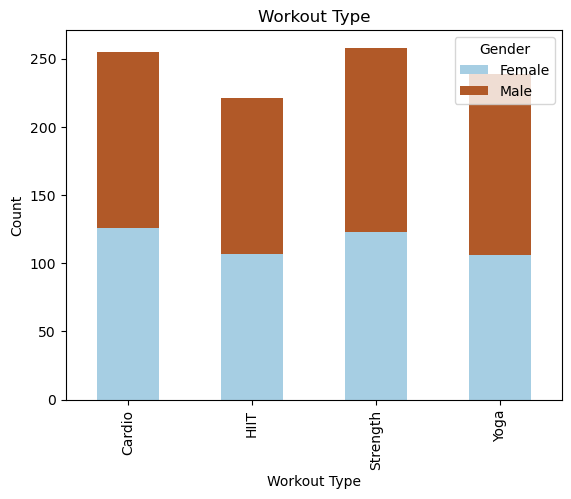

In [39]:
plt.figure(figsize=(10,8))
pd.crosstab(df["Workout_Type"],df["Gender"]).plot(kind="bar", stacked=True, colormap="Paired")
plt.title("Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Count")
plt.show()

                                